<a href="https://colab.research.google.com/github/RDelg/rl-book/blob/master/chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.table import Table

In [0]:
class Maze(object):
    
    actions = [
        np.array([-1, 0]),
        np.array([1, 0]),
        np.array([0, -1]),
        np.array([0, 1])
    ]

    def __init__(self, shape: tuple, init_state: np.ndarray = np.array([0,0])):
        assert len(shape) == 2, \
            "shape must be 2d"
        assert len(init_state) == 2, \
            "init_state shape must be 2d"
        assert init_state[0] >= 0 and init_state[1] >= 0, \
            "init_state must be positive"
        assert init_state[0] < shape[0] and init_state[1] < shape[1], \
            "init_state must be inside shape"
        self.rewards = np.zeros(shape=shape)
        self.hops = []
        self.state = init_state
        (self.n, self.m) = shape

    def add_reward(self, state: np.ndarray, reward: float):
        assert len(state) == 2, \
            "state shape must be 2d"
        self.rewards[state[0], state[1]] = reward
    
    def add_hop(self, state: np.ndarray, new_state: np.ndarray):
        assert len(state) == 2, \
            "state shape must be 2d"
        assert len(new_state) == 2, \
            "state shape must be 2d"
        self.hops.append({'old_state': state, 'new_state': new_state})
    
    def set_state(self, state: np.ndarray):
        assert len(state) == 2, \
            "state shape must be 2d"
        self.state = state
    
    def step(self, action: np.ndarray):
        assert len(action) == 2, \
            "action shape must be 2d"
        current_state = self.state
        for hop in self.hops:
            if (self.state == hop['old_state']).all():
                self.state = hop['new_state']
                return self.rewards[current_state[0], current_state[1]]
        new_state = self.state + action
        if new_state[0] < 0 or new_state[0] >= self.n or new_state[1] < 0 or new_state[1] >= self.m:
            new_state = current_state
            reward = -1.0
        else:
            reward = self.rewards[current_state[0], current_state[1]]
        self.state = new_state
        return reward

In [0]:
class ValueLearner(object):
    def __init__(self, maze: Maze, discount: float, random: bool = True):
        self.maze = maze
        self.random = random
        self.value = np.zeros(shape=(maze.n, maze.m))
        self.discount = discount
    
    def update_value(self):
        new_value = np.zeros_like(self.value)
        values = np.zeros(shape=len(self.maze.actions))
        for i in range(self.value.shape[0]):
            for j in range(self.value.shape[1]):
                for z, action in enumerate(self.maze.actions):
                    self.maze.set_state(np.array([i, j]))
                    reward = self.maze.step(action)
                    if self.random:
                        new_value[i, j] += 1.0/len(self.maze.actions) * \
                            (reward + self.discount * self.value[self.maze.state[0], self.maze.state[1]])
                    else:
                        values[z] = reward + self.discount * \
                            self.value[self.maze.state[0], self.maze.state[1]]
                if not self.random:
                    new_value[i, j] = np.max(values)
        self.value = new_value

    def plot_value(self):
        rounded_value = np.round(self.value, decimals=2)
        fig, ax = plt.subplots()
        ax.set_axis_off()
        tb = Table(ax, bbox=[0, 0, 1, 1])

        nrows, ncols = rounded_value.shape
        width, height = 1.0 / ncols, 1.0 / nrows

        for (i, j), val in np.ndenumerate(rounded_value):
            tb.add_cell(i, j, width, height, text=val,
                        loc='center', facecolor='white')

        for i in range(len(rounded_value)):
            tb.add_cell(i, -1, width, height, text=i+1, loc='right',
                        edgecolor='none', facecolor='none')
            tb.add_cell(-1, i, width, height/2, text=i+1, loc='center',
                        edgecolor='none', facecolor='none')

        ax.add_table(tb)

In [0]:
def figure_3_2(maze):
    learner = ValueLearner(maze=maze, discount=DISCOUNT, random=True)
    while True:
        value = learner.value.copy()
        learner.update_value()
        new_value = learner.value
        if np.sum(np.abs(value - new_value)) < 1e-4:
            learner.plot_value()
            break

In [0]:
def figure_3_5(maze):
    learner = ValueLearner(maze=maze, discount=DISCOUNT, random=False)
    while True:
        value = learner.value.copy()
        learner.update_value()
        new_value = learner.value
        if np.sum(np.abs(value - new_value)) < 1e-4:
            learner.plot_value()
            break

In [0]:
SHAPE = (5,5)
A = np.array([0, 1])
A_PRIME = np.array([4, 1])
B = np.array([0, 3])
B_PRIME = np.array([2, 3])
DISCOUNT = 0.9

m = Maze(shape=SHAPE)
m.add_reward(A, 10)
m.add_reward(B, 5)
m.add_hop(A, A_PRIME)
m.add_hop(B, B_PRIME)

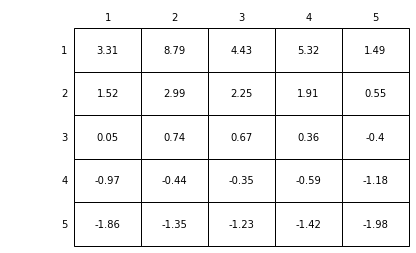

In [7]:
figure_3_2(maze=m)

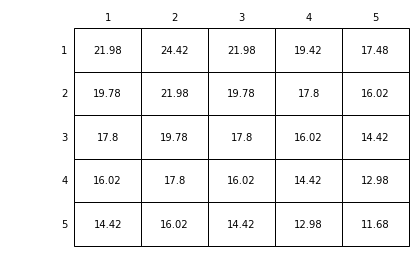

In [8]:
figure_3_5(maze=m)